# Reference States


In this lesson, we will explore how we can initialize our system with a reference state to help our variational algorithm converge faster. First, we will learn how to construct a reference state manually, and then explore several standard options that can be used in a variational algorithm.

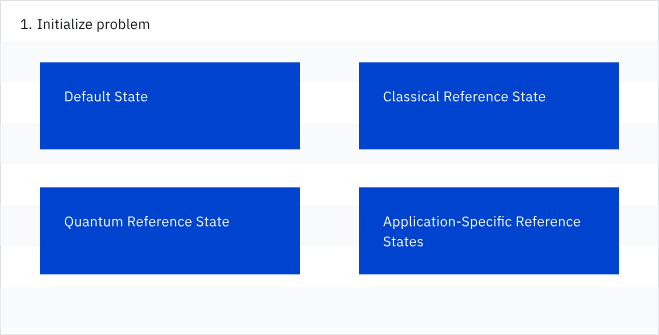

## Default State

A reference state refers to the initial fixed start for our problem. To prepare a reference state, we need to apply the appropriate, non-parametrized unitary $U_{R}$ at the start of our quantum circuit, such that $\ket{\rho} = U_{R}\ket{0}$. If you have an educated guess or datapoint from an existing optimal solution, the variational algorithm will likely converge faster if you use that as a starting point.

The simplest possible reference state is the default state, where we use the starting state of an $n$-qubit quantum circuit: $\ket{0}^{\otimes n}$. For the default state, our unitary operator $U_{R} \equiv I$. Due to its simplicity, the default state is a valid reference state used in many scenarios.

#### Example:

Suppose we have a simple 2-qubit system starting in the state $\ket{00}$.

1. Initial state: $\ket{00}$
2. Target reference state: $\ket{01}$
3. Unitary operator $U_{R}: 
- We can apply an X gate to the second qubit: $U_{R} = X_{1}$
4. Final state: $\ket{\rho} = X_{1}\ket{00} = U_{R}\ket{00} = \ket{01}$

## Classical reference state

Suppose you have a 3-qubit system and you want to start in the state $\ket{001}$ instead of the default state $\ket{000}$. This is an example of a purely classical reference state. We can construct it as follows:

1. Initial state: the default state $\ket{000}$
2. Target state: $\ket{001}$
3. Apply gates: Apply an $X$ gate to the third qubit (if we follow Qiskit's little endian qubit ordering this would be qubit 0)
- $X_{0}\ket{000}$ = $\ket{001}$

In this case, our unitary operator is $U_{R} \equiv X_{0}$, which leads the reference state $\ket{\rho} \equiv \ket{001}$.

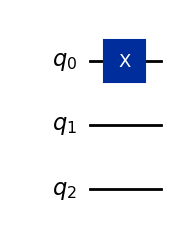

In [10]:
from qiskit import QuantumCircuit

qc = QuantumCircuit(3)
qc.x(0)

qc.draw("mpl")

## Quantum reference state

Suppose you aim to start with a more complex state that involves superposition and/or entanglement, such as $\frac{1}{\sqrt{2}}(\ket{100} + \ket{111})$.

To obtain this state from $\ket{000}$, one approach is to use:
- a Hadamard gate to qubit $0$ ($H_{0}$)
- a CNOT gate with qubit $0$ as the control qubit and qubit $1$ as the target qubit ($CNOT_{01}$)
- finally an $X$ gate applied to qubit $2$ ($X_{2}$)

In this scenario, our unitary operator is $U_{R} \equiv X_{2}CNOT_{01}H_{0}\ket{000}$, and our reference state is $\ket{\rho} \equiv \frac{1}{\sqrt{2}}(\ket{100} + \ket{111})$.

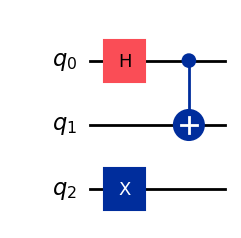

In [3]:
qc = QuantumCircuit(3)
qc.h(0)
qc.cx(0, 1)
qc.x(2)

qc.draw("mpl")

## Constructing Reference States using template circuits

We can also use various template circuits, such as 
`TwoLocal` (a parameterized circuit consisting of alternating rotation layers and entanglement layers) which allows for expressing multiple tunable parameters and entanglements with ease. We will cover these template circuits in more detail in the next lesson, but we can use them for our reference states *if* we bind the parameters.

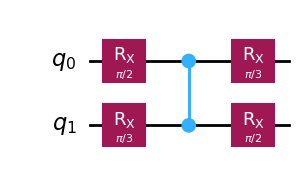

In [4]:
from qiskit.circuit.library import TwoLocal
from math import pi

reference_circuit = TwoLocal(2, "rx", "cz", entanglement="linear", reps=1)
theta_list = [pi / 2, pi / 3, pi / 3, pi / 2]

reference_circuit = reference_circuit.assign_parameters(theta_list)

reference_circuit.decompose().draw("mpl")

## Application-specific reference states

### Quantum Machine Learning

In the context of a variational quantum classifier (VQC), the training data is encoded into a quantum state with a parameterized circuit known as a *feature* map, where each parameter value represents a data point from the training dataset. The ZZFeatureMap is a type of parameterized circuit that can be utilized to pass our data points ($𝑥$) to this feature map.

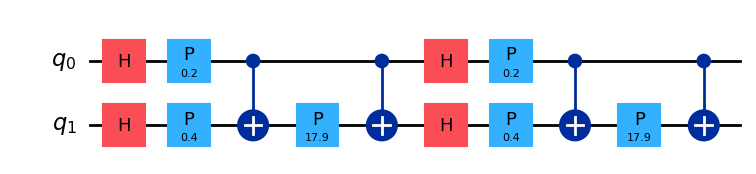

In [5]:
from qiskit.circuit.library import ZZFeatureMap

data = [0.1, 0.2]

zz_feature_map_reference = ZZFeatureMap(feature_dimension=2, reps=2)
zz_feature_map_reference = zz_feature_map_reference.assign_parameters(data)
zz_feature_map_reference.decompose().draw("mpl")

## Summary

With this lesson, you learned how to initialize your system using:
- Default reference state
- Classical reference states
- Quantum reference states
- Application-specific reference states

Our high-level variational workload looks as follows:

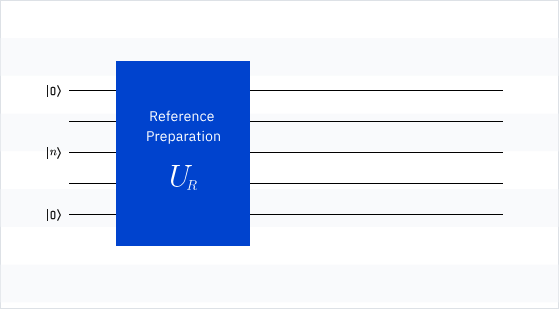

While reference states are fixed, initial starting points, we can use a *variational form* to define an *ansatz* to represent a collection of parametrized states for our variational algorithm to explore.